# DOB Job Application Filings NYC Map Visualization

- This notebook contains a visualization of construction jobs that have been fully permitted throughout 2019 and 2021 and categorized as job type category "NB" which denotes that the job is a new building. 
- Each fully permitted job will be represented as a point on a map of New York City as designated by its Latitude and Longitude data which is included in the dataset. 
- Jobs with a proposed number of stories 7-9 in height will be depicted on a map and compared with jobs with a proposed number of stories of 10 or more in height per each year from 2019-2021.

# Jobs 10 Stories and Higher 2019

In [26]:
import numpy as np
import pandas as pd

In [27]:
df_over10_2019 = pd.read_csv("mrkt_over_10_2019.csv")

In [28]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [29]:
street_map = gpd.read_file('geo_export_9d3a09f4-3d5a-46fd-9eb8-1f37f9ef7177.shp')

In [30]:
df_over10_2019.head()

,Unnamed: 0,Job #,Borough,House #,Street Name,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Applicant's First Name,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert,Fully Permitted,Existing Zoning Sqft,Proposed Zoning Sqft,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner's First Name,Owner's Last Name,Owner's Business Name,City,Owner'sPhone #,Job Description,DOBRunDate,JOB_S1_NO,GIS_LATITUDE,GIS_LONGITUDE,GIS_NTA_NAME
0,8,121187802,MANHATTAN,145,WEST 47 ST,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,11/05/2021,OTHERS,105,JONATHAN,MOSS,RA,25207,N,2019-02-11,0,263586,0,48,0,509,DAVID,WROBEL,CLARITY 47 LLC,NaN,2124218100,NaN,12/28/2021 00:00:00,2765418,40.758577,-73.983100,Midtown-Midtown South
1,19,220617205,BRONX,2065,RYER AVENUE,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,08/20/2021,OTHERS,205,ADAM,SNYDER,RA,31777,N,2019-12-03,0,43963,0,12,0,112,GZIM,HASANDJEKIC,2065 PROPERTY OWNERS LLC,NaN,2126794590,NaN,08/21/2021 00:00:00,2858979,40.852175,-73.901116,Mount Hope
2,26,123178499,MANHATTAN,199,CHRYSTIE STREET,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,12/01/2021,OTHERS,103,WADE,JOHNSON,RA,19883,N,2019-01-29,0,43147,0,14,0,145,SCOTT,KUMMINGS,SAGAMORE AK PROPERTY COMPANY LLC,NaN,2124526077,NEW 14TH STORY BUILDING,12/02/2021 00:00:00,2877572,40.722048,-73.991840,Chinatown
3,27,210178038,BRONX,1074,WASHINGTON AVENUE,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,07/30/2021,OTHERS,203,MARK,GINSBERG,RA,19534,N,2019-08-20,0,135397,0,12,0,122,SAMANTHA,MAGISTRO,BP UM PARTNERS LLC,NaN,9172945840,NaN,07/31/2021 00:00:00,2936660,40.827907,-73.908769,Morrisania-Melrose
4,33,321185828,BROOKLYN,540,FULTON STREET,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,05/06/2021,OTHERS,302,JONATHAN,MARVEL,RA,21551,N,2019-01-22,0,333041,0,43,0,498,SAMUEL,DUSHEY,540 FULTON ASSOCIATES LLC,NaN,2128896405,NaN,05/07/2021 00:00:00,2605515,40.689011,-73.981228,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill


In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_over10_2019 = df_over10_2019.drop(columns=['Unnamed: 0'])

In [32]:
df_over10_2019.head()

,Job #,Borough,House #,Street Name,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Applicant's First Name,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert,Fully Permitted,Existing Zoning Sqft,Proposed Zoning Sqft,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner's First Name,Owner's Last Name,Owner's Business Name,City,Owner'sPhone #,Job Description,DOBRunDate,JOB_S1_NO,GIS_LATITUDE,GIS_LONGITUDE,GIS_NTA_NAME
0,121187802,MANHATTAN,145,WEST 47 ST,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,11/05/2021,OTHERS,105,JONATHAN,MOSS,RA,25207,N,2019-02-11,0,263586,0,48,0,509,DAVID,WROBEL,CLARITY 47 LLC,NaN,2124218100,NaN,12/28/2021 00:00:00,2765418,40.758577,-73.983100,Midtown-Midtown South
1,220617205,BRONX,2065,RYER AVENUE,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,08/20/2021,OTHERS,205,ADAM,SNYDER,RA,31777,N,2019-12-03,0,43963,0,12,0,112,GZIM,HASANDJEKIC,2065 PROPERTY OWNERS LLC,NaN,2126794590,NaN,08/21/2021 00:00:00,2858979,40.852175,-73.901116,Mount Hope
2,123178499,MANHATTAN,199,CHRYSTIE STREET,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,12/01/2021,OTHERS,103,WADE,JOHNSON,RA,19883,N,2019-01-29,0,43147,0,14,0,145,SCOTT,KUMMINGS,SAGAMORE AK PROPERTY COMPANY LLC,NaN,2124526077,NEW 14TH STORY BUILDING,12/02/2021 00:00:00,2877572,40.722048,-73.991840,Chinatown
3,210178038,BRONX,1074,WASHINGTON AVENUE,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,07/30/2021,OTHERS,203,MARK,GINSBERG,RA,19534,N,2019-08-20,0,135397,0,12,0,122,SAMANTHA,MAGISTRO,BP UM PARTNERS LLC,NaN,9172945840,NaN,07/31/2021 00:00:00,2936660,40.827907,-73.908769,Morrisania-Melrose
4,321185828,BROOKLYN,540,FULTON STREET,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,05/06/2021,OTHERS,302,JONATHAN,MARVEL,RA,21551,N,2019-01-22,0,333041,0,43,0,498,SAMUEL,DUSHEY,540 FULTON ASSOCIATES LLC,NaN,2128896405,NaN,05/07/2021 00:00:00,2605515,40.689011,-73.981228,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill


In [33]:
import pyproj
from pyproj import CRS
from pyproj import Proj

In [34]:
print(pyproj.__version__)
print(gpd.__version__)

3.3.0
0.10.2


In [35]:
# designate coordinate system
crs=CRS('EPSG:4326')
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df_over10_2019['GIS_LONGITUDE'], df_over10_2019['GIS_LATITUDE'])]
# create GeoPandas dataframe
geo_df_over10_2019 = gpd.GeoDataFrame(df_over10_2019,
 crs = crs,
 geometry = geometry)

In [44]:
geo_df_over10_2019.to_file("geo_df_over10_2019")

<ipython-input-44-1470c0281297>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_df_over10_2019.to_file("geo_df_over10_2019")


In [36]:
geo_df_over10_2019.head()

,Job #,Borough,House #,Street Name,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Applicant's First Name,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert,Fully Permitted,Existing Zoning Sqft,Proposed Zoning Sqft,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner's First Name,Owner's Last Name,Owner's Business Name,City,Owner'sPhone #,Job Description,DOBRunDate,JOB_S1_NO,GIS_LATITUDE,GIS_LONGITUDE,GIS_NTA_NAME,geometry
0,121187802,MANHATTAN,145,WEST 47 ST,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,11/05/2021,OTHERS,105,JONATHAN,MOSS,RA,25207,N,2019-02-11,0,263586,0,48,0,509,DAVID,WROBEL,CLARITY 47 LLC,NaN,2124218100,NaN,12/28/2021 00:00:00,2765418,40.758577,-73.983100,Midtown-Midtown South,POINT (-73.98310 40.75858)
1,220617205,BRONX,2065,RYER AVENUE,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,08/20/2021,OTHERS,205,ADAM,SNYDER,RA,31777,N,2019-12-03,0,43963,0,12,0,112,GZIM,HASANDJEKIC,2065 PROPERTY OWNERS LLC,NaN,2126794590,NaN,08/21/2021 00:00:00,2858979,40.852175,-73.901116,Mount Hope,POINT (-73.90112 40.85218)
2,123178499,MANHATTAN,199,CHRYSTIE STREET,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,12/01/2021,OTHERS,103,WADE,JOHNSON,RA,19883,N,2019-01-29,0,43147,0,14,0,145,SCOTT,KUMMINGS,SAGAMORE AK PROPERTY COMPANY LLC,NaN,2124526077,NEW 14TH STORY BUILDING,12/02/2021 00:00:00,2877572,40.722048,-73.991840,Chinatown,POINT (-73.99184 40.72205)
3,210178038,BRONX,1074,WASHINGTON AVENUE,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,07/30/2021,OTHERS,203,MARK,GINSBERG,RA,19534,N,2019-08-20,0,135397,0,12,0,122,SAMANTHA,MAGISTRO,BP UM PARTNERS LLC,NaN,9172945840,NaN,07/31/2021 00:00:00,2936660,40.827907,-73.908769,Morrisania-Melrose,POINT (-73.90877 40.82791)
4,321185828,BROOKLYN,540,FULTON STREET,NB,R,PERMIT ISSUED - ENTIRE JOB/WORK,05/06/2021,OTHERS,302,JONATHAN,MARVEL,RA,21551,N,2019-01-22,0,333041,0,43,0,498,SAMUEL,DUSHEY,540 FULTON ASSOCIATES LLC,NaN,2128896405,NaN,05/07/2021 00:00:00,2605515,40.689011,-73.981228,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,POINT (-73.98123 40.68901)


In [37]:
print(geo_df_over10_2019.columns)

Index(['Job #', 'Borough', 'House #', 'Street Name', 'Job Type', 'Job Status',
       'Job Status Descrp', 'Latest Action Date', 'Building Type',
       'Community - Board', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Fully Permitted', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height',
       'Owner's First Name', 'Owner's Last Name', 'Owner's Business Name',
       'City ', 'Owner'sPhone #', 'Job Description', 'DOBRunDate', 'JOB_S1_NO',
       'GIS_LATITUDE', 'GIS_LONGITUDE', 'GIS_NTA_NAME', 'geometry'],
      dtype='object')


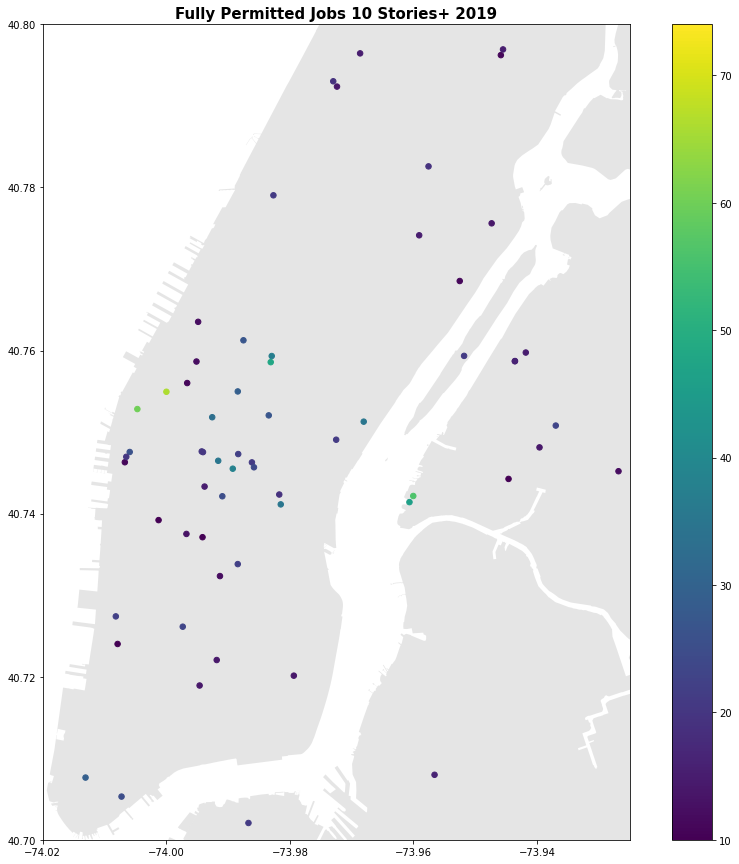

In [38]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.2,color='grey')
# add geodataframe to axes
# assign ‘Proposed No. of Stories’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df_over10_2019.plot(column='Proposed No. of Stories',ax=ax,alpha=1, legend=True, markersize=30)
# add title to graph
plt.title("Fully Permitted Jobs 10 Stories+ 2019", fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()

# Jobs 7-9 Stories High 2019


In [39]:
df_btwn_7_9_2019 = pd.read_csv("mrkt_btwn_7_and_9_2019.csv")

In [40]:
street_map = gpd.read_file('geo_export_9d3a09f4-3d5a-46fd-9eb8-1f37f9ef7177.shp')

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_btwn_7_9_2019 = df_btwn_7_9_2019.drop(columns=['Unnamed: 0'])

In [42]:
# designate coordinate system
crs=CRS('EPSG:4326')
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df_btwn_7_9_2019['GIS_LONGITUDE'], df_btwn_7_9_2019['GIS_LATITUDE'])]
# create GeoPandas dataframe
geo_df_btwn_7_9_2019 = gpd.GeoDataFrame(df_btwn_7_9_2019,
 crs = crs,
 geometry = geometry)

In [45]:
geo_df_btwn_7_9_2019.to_file("geo_df_btwn_7_9_2019")

<ipython-input-45-e83974556404>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_df_btwn_7_9_2019.to_file("geo_df_btwn_7_9_2019")


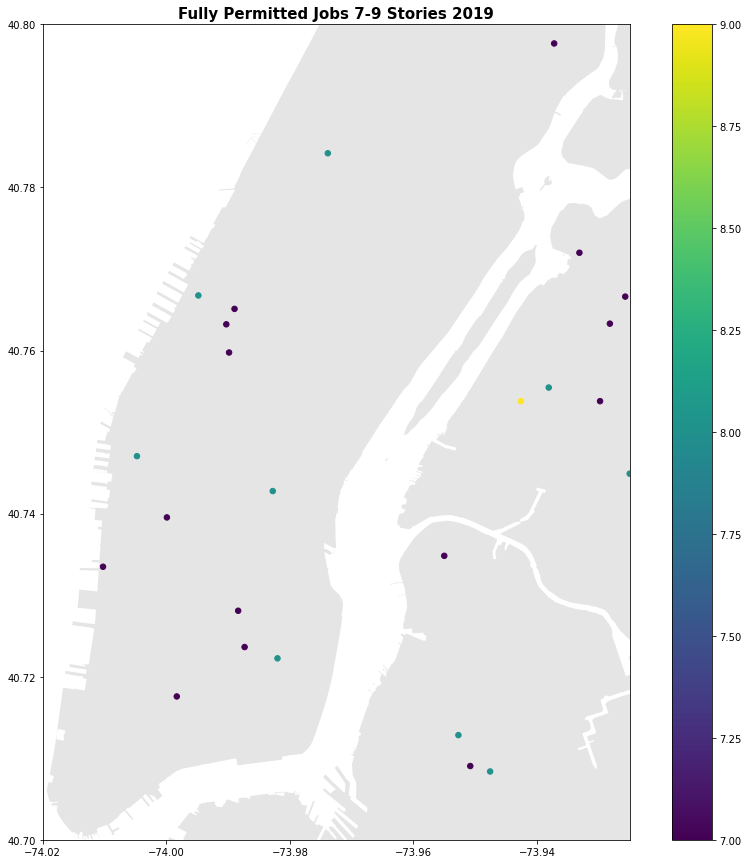

In [43]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.2,color='grey')
# add geodataframe to axes
# assign ‘Proposed No. of Stories’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df_btwn_7_9_2019.plot(column='Proposed No. of Stories',ax=ax,alpha=1, legend=True, markersize=30)
# add title to graph
plt.title("Fully Permitted Jobs 7-9 Stories 2019", fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()